In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv"
data = pd.read_csv(url)

In [3]:
data = data.replace({"-": 0})         ##Reemplazamos los valores -  con un 0
data = data.replace(np.nan, 0)        ##Reemplazamos los valores no existentes con un 0

In [4]:
for col in data.columns:              ## Cambiamos el tipo de data
    if col != "Region" and col != "Poblacion":
        data[col] = data[col].astype(int)

## Mostramos la Información entregada por el ministerios de Ciencia
* Los valores que están en 0 fueron transformados desde valores no entregados como "-" o NaN. Para un mejor trabajo de los datos. EN NINGUN CASO SIGNIFICA QUE EN ESOS DIAS SE HICIERON 0 TEST POR REGIÓN.

In [5]:
data

,Region,Codigo region,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10
0,Arica y Parinacota,15,252110,70,0,93,103,0,93,24,...,124,87,41,89,86,77,123,92,127,74
1,Tarapacá,1,382773,0,0,0,0,0,0,0,...,8,102,90,90,123,53,221,169,184,185
2,Antofagasta,2,691854,182,128,107,175,103,95,117,...,164,312,271,231,182,236,247,291,215,419
3,Atacama,3,314709,57,52,60,25,20,22,25,...,114,105,75,70,111,107,164,167,111,101
4,Coquimbo,4,836096,0,0,0,0,0,0,0,...,166,165,102,191,0,23,51,59,66,370
5,Valparaíso,5,1960170,301,249,248,273,223,92,385,...,450,327,251,196,233,268,690,573,588,489
6,Metropolitana,13,8125072,5383,3185,2105,3861,1850,1656,2694,...,6144,6922,4570,5631,5509,6920,8382,7839,8345,7691
7,O’Higgins,6,991063,68,0,74,0,74,30,30,...,94,181,63,72,214,174,68,150,131,269
8,Maule,7,1131939,397,219,0,341,113,160,0,...,187,339,302,322,267,135,93,181,238,446
9,Ñuble,16,511551,364,0,259,189,65,0,0,...,129,101,97,69,0,213,171,110,156,196


## Cantidad de tests totales realizados a lo largo del tiempo en el pais

In [6]:
fechas = data.columns[(data.columns != 'Region') & (data.columns != 'Poblacion') & (data.columns != "Codigo region")]

In [7]:
X = []
Y = []
for fecha in fechas:
    total = data[fecha].sum()
    Y.append(total)
    X.append(fecha)

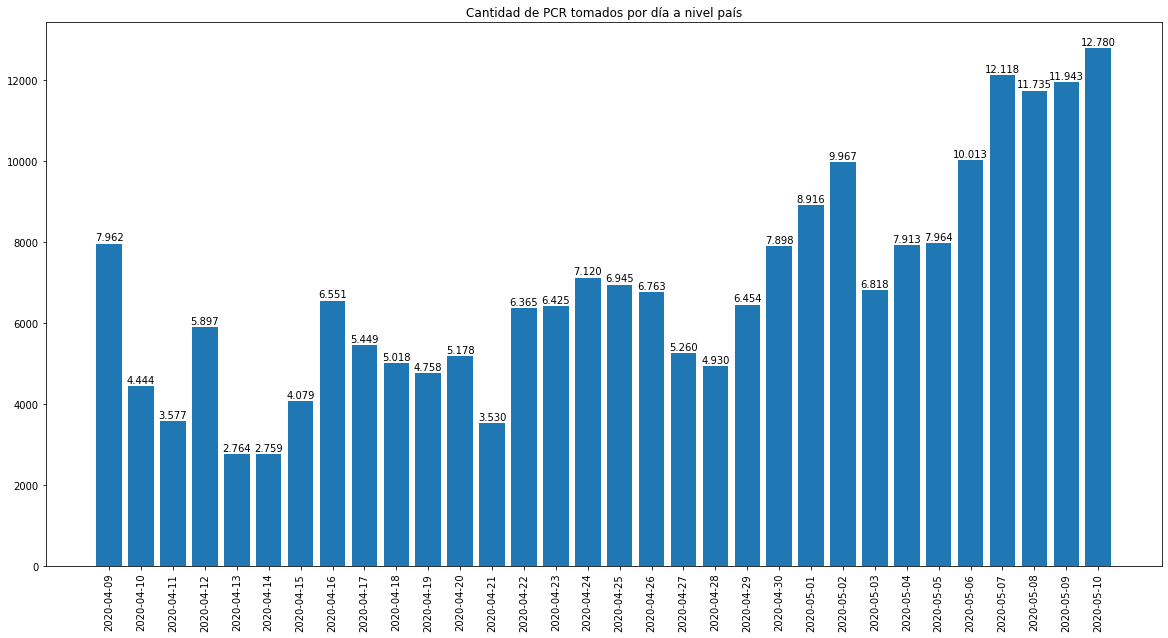

In [8]:
plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.xticks(X, rotation='vertical')
plt.title("Cantidad de PCR tomados por día a nivel país")
utils.labelon(X, Y, 0, 1, 10,'black', 'normal')
plt.show()

## Cantidad total de test por región

In [9]:
total_por_region =  data[fechas].sum(axis=1).to_list()
Y                =  total_por_region
X                =  data["Region"].to_list()

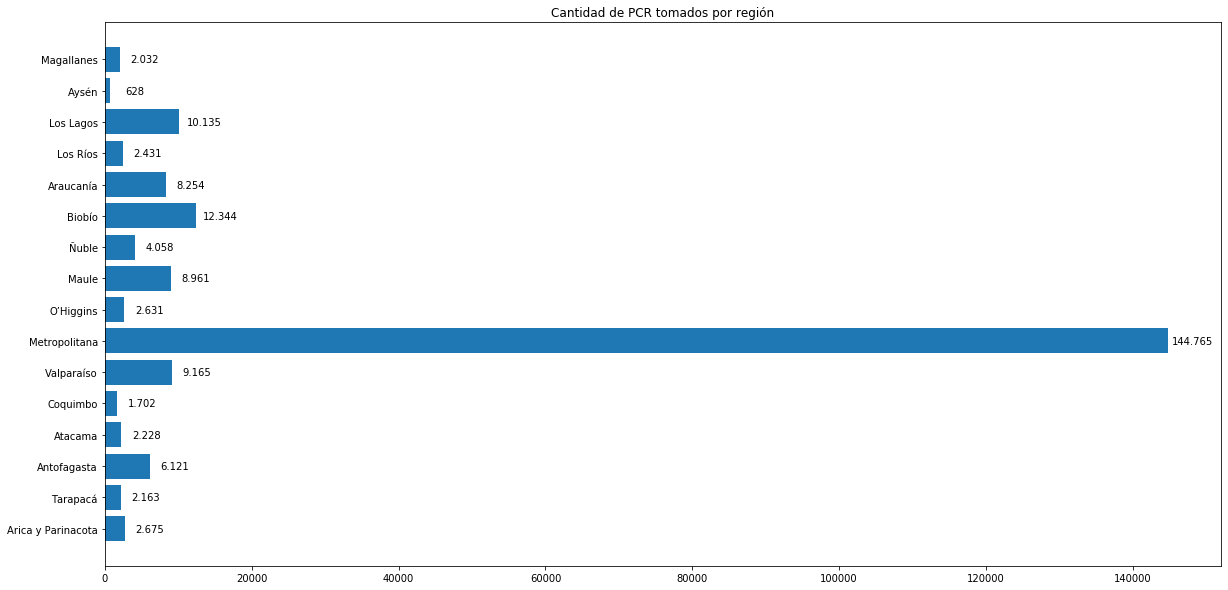

In [10]:
plt.figure(figsize=(20,10))
plt.barh(X,Y)
plt.title("Cantidad de PCR tomados por región")
utils.labelon_h(X, Y, 25, -5, 10,'black', 'normal')
plt.show()

## Porcentaje de test positivos por día

### Creamos el dataframe de |fecha | PCRS|

In [11]:
pcr_totales = data[fechas].sum().values.tolist()

In [12]:
df_pcr_totales = pd.DataFrame({
                                'Fecha': fechas,
                                'PCRS': pcr_totales
                                })

In [13]:
df_pcr_totales.tail(5)

,Fecha,PCRS
27,2020-05-06,10013
28,2020-05-07,12118
29,2020-05-08,11735
30,2020-05-09,11943
31,2020-05-10,12780


### Creamos el dataframe |Fecha|Cantidad de positivos|

In [14]:
url        = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data_total = pd.read_csv(url)
positivos  = data_total[data_total["Fecha"] == "Casos nuevos totales"]
positivos

,Fecha,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10
6,Casos nuevos totales,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,985,1427,1228,980,1373,1032,1533,1391,1247,1647


In [15]:
fecha_positivos = positivos.columns[1:]
test_positivos  = positivos.values.tolist()[0][1:]
df_positivos    = pd.DataFrame({
                                'Fecha': fecha_positivos,
                                'Positivos': test_positivos
                                })

In [16]:
df_positivos.tail(5)

,Fecha,Positivos
64,2020-05-06,1032.0
65,2020-05-07,1533.0
66,2020-05-08,1391.0
67,2020-05-09,1247.0
68,2020-05-10,1647.0


### Unimos los dataframe

In [17]:
df = pd.merge(df_pcr_totales, df_positivos, on='Fecha')

In [18]:
df["Porcentaje de positivos"] = ((df["Positivos"]*100) / df["PCRS"])

In [19]:
df.tail(5)

,Fecha,PCRS,Positivos,Porcentaje de positivos
27,2020-05-06,10013,1032.0,10.306601
28,2020-05-07,12118,1533.0,12.650602
29,2020-05-08,11735,1391.0,11.853430
30,2020-05-09,11943,1247.0,10.441263
31,2020-05-10,12780,1647.0,12.887324


## Porcentaje de test positivos a lo largo del tiempo

In [20]:
X = df["Fecha"].values.tolist()
Y = df["Porcentaje de positivos"].values.tolist()

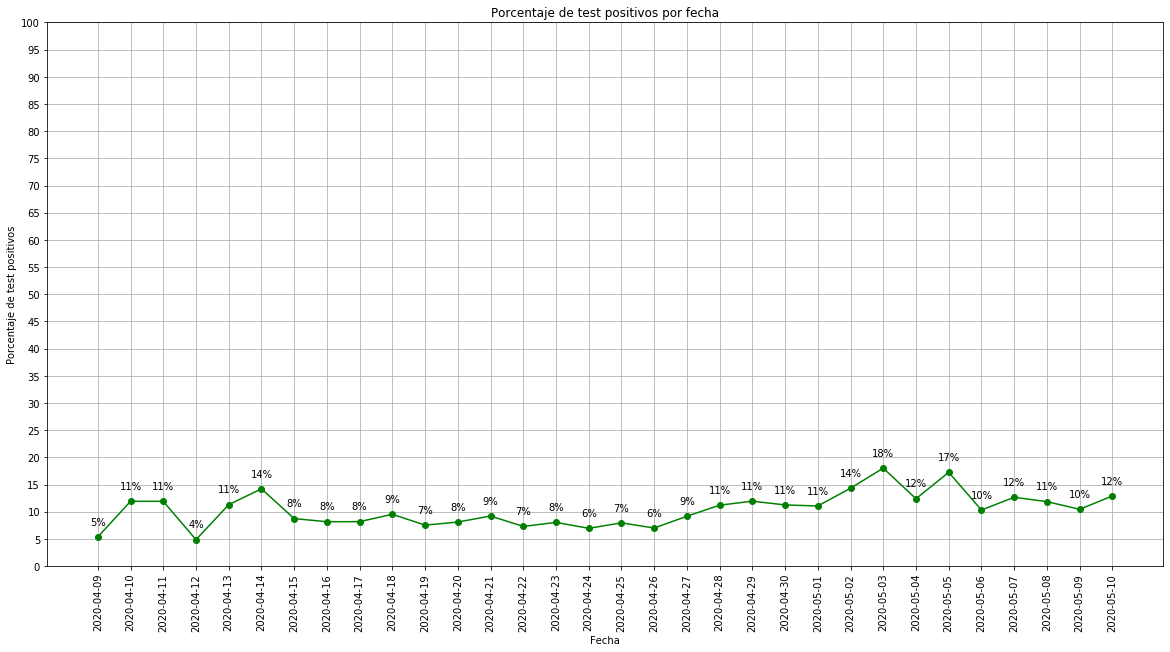

In [21]:
plt.figure(figsize=(20,10))
plt.plot(X, Y, 'go-')
utils.labelon(X, Y, 0, 10, 10,'black', 'normal', "%")
plt.xlabel('Fecha')
plt.ylabel("Porcentaje de test positivos")
plt.title("Porcentaje de test positivos por fecha")
plt.grid()
plt.xticks(X, rotation='vertical')
plt.yticks(np.arange(0, 105, 5))
plt.show()

### Testo tomados vs test positivos

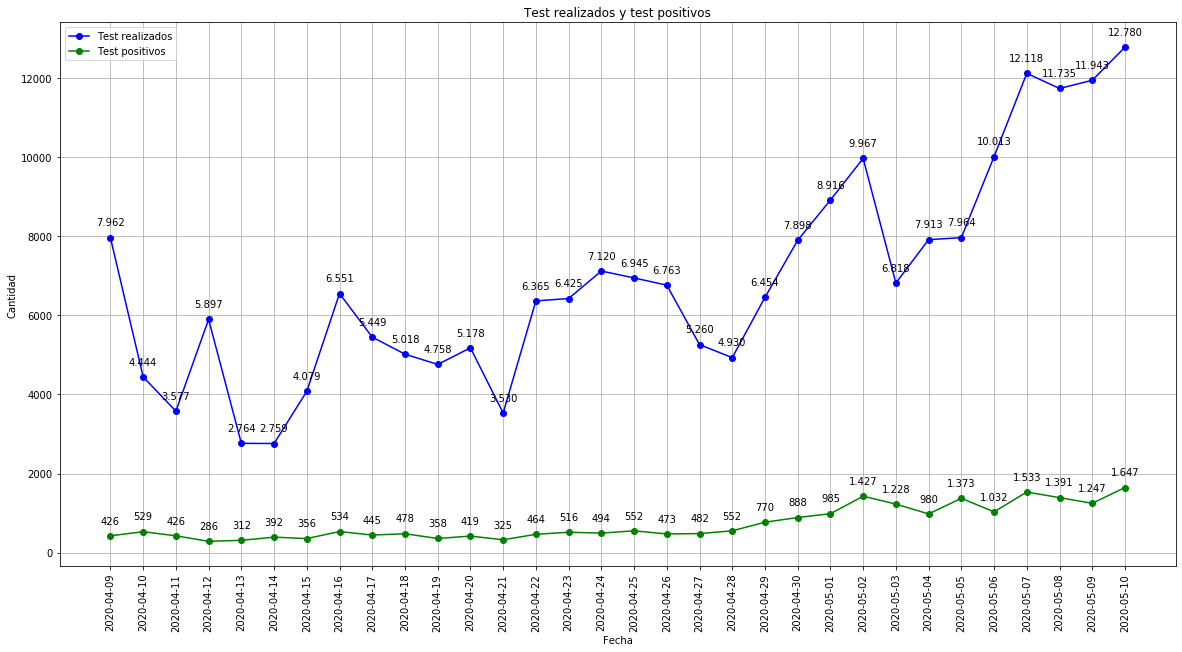

In [22]:
plt.figure(figsize=(20,10))
plt.plot(df["Fecha"], df["PCRS"], 'bo-')
utils.labelon(df["Fecha"], df["PCRS"], 0, 10, 10,'black', 'normal')

plt.plot(df["Fecha"], df["Positivos"], 'go-')
utils.labelon(df["Fecha"], df["Positivos"], 0, 10, 10,'black', 'normal')

plt.xlabel('Fecha')
plt.ylabel("Cantidad")
plt.title("Test realizados y test positivos")
plt.grid()
plt.xticks(df["Fecha"], rotation='vertical')
plt.legend(["Test realizados", "Test positivos"])
plt.show()